# EDA & Feature Engineering - Accidents routiers

## Objectif
- Analyser les distributions et corrélations
- Visualiser les patterns
- Identifier les features importantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset nettoyé
df = pd.read_csv('../données/dataset_clean.csv')
print(f"Dataset : {df.shape}")
print(f"Mortels : {df['mortel'].sum()} ({df['mortel'].mean()*100:.1f}%)")

Matplotlib is building the font cache; this may take a moment.


Dataset : (51055, 22)
Mortels : 3011 (5.9%)


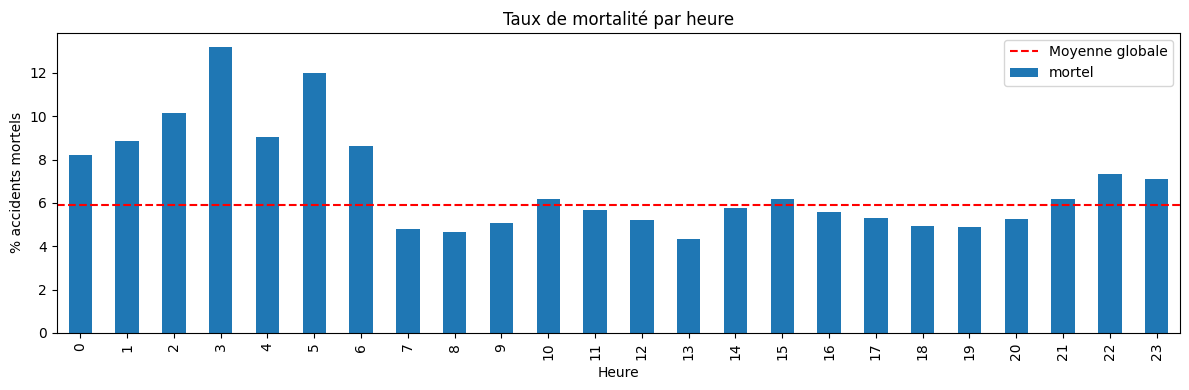

In [2]:
# Taux de mortalité par heure
mortalite_heure = df.groupby('heure')['mortel'].mean() * 100

plt.figure(figsize=(12, 4))
mortalite_heure.plot(kind='bar')
plt.title('Taux de mortalité par heure')
plt.xlabel('Heure')
plt.ylabel('% accidents mortels')
plt.axhline(y=df['mortel'].mean()*100, color='r', linestyle='--', label='Moyenne globale')
plt.legend()
plt.tight_layout()
plt.show()

### Observation : heure

Les accidents de nuit (22h-6h) ont un taux de mortalité plus élevé que la moyenne.
Hypothèses : visibilité, fatigue, alcool, vitesse.

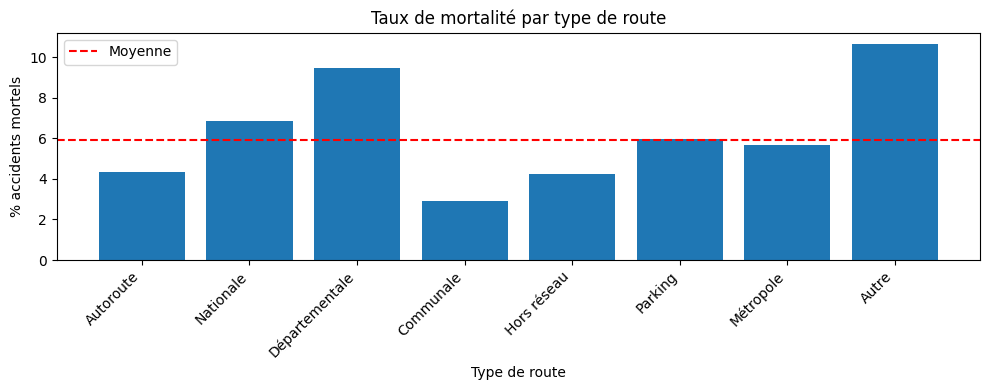

In [3]:
# Taux de mortalité par catégorie de route
catr_labels = {1: 'Autoroute', 2: 'Nationale', 3: 'Départementale',
                4: 'Communale', 5: 'Hors réseau', 6: 'Parking',
                7: 'Métropole', 9: 'Autre'}

mortalite_route = df.groupby('catr')['mortel'].agg(['mean', 'count'])
mortalite_route['label'] = mortalite_route.index.map(catr_labels)
mortalite_route['mean'] = mortalite_route['mean'] * 100

plt.figure(figsize=(10, 4))
plt.bar(mortalite_route['label'], mortalite_route['mean'])
plt.title('Taux de mortalité par type de route')
plt.xlabel('Type de route')
plt.ylabel('% accidents mortels')
plt.axhline(y=df['mortel'].mean()*100, color='r', linestyle='--', label='Moyenne')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Voir les chiffres exacts
mortalite_route = df.groupby('catr')['mortel'].agg(['sum', 'count', 'mean'])
mortalite_route['mean'] = (mortalite_route['mean'] * 100).round(1)
mortalite_route['label'] = mortalite_route.index.map(catr_labels)
mortalite_route.columns = ['nb_mortels', 'nb_accidents', 'taux_%', 'type']
print(mortalite_route)

      nb_mortels  nb_accidents  taux_%            type
catr                                                  
1            217          4996     4.3       Autoroute
2            164          2390     6.9       Nationale
3           1867         19712     9.5  Départementale
4            632         21813     2.9       Communale
5              2            47     4.3     Hors réseau
6             25           419     6.0         Parking
7             85          1500     5.7       Métropole
9             19           178    10.7           Autre


### Observation : type de route

- Départementales = plus mortelles (9.5%) malgré vitesse < autoroute
- Communales = moins mortelles (2.9%) grâce à la vitesse réduite en ville
- La sécurité dépend de l'infrastructure, pas seulement de la vitesse

In [5]:
# Taux de mortalité par conditions météo
atm_labels = {-1: 'Non renseigné', 1: 'Normale', 2: 'Pluie légère',
            3: 'Pluie forte', 4: 'Neige/grêle', 5: 'Brouillard',
            6: 'Vent fort', 7: 'Éblouissant', 8: 'Couvert', 9: 'Autre'}

mortalite_meteo = df.groupby('atm')['mortel'].agg(['sum', 'count', 'mean'])
mortalite_meteo['mean'] = (mortalite_meteo['mean'] * 100).round(1)
mortalite_meteo['label'] = mortalite_meteo.index.map(atm_labels)
mortalite_meteo.columns = ['nb_mortels', 'nb_accidents', 'taux_%', 'météo']
print(mortalite_meteo)

     nb_mortels  nb_accidents  taux_%         météo
atm                                                
1          2296         38894     5.9       Normale
2           307          6491     4.7  Pluie légère
3            93          1376     6.8   Pluie forte
4            16           232     6.9   Neige/grêle
5            73           528    13.8    Brouillard
6            21           168    12.5     Vent fort
7            58           793     7.3   Éblouissant
8           126          2331     5.4       Couvert
9            21           242     8.7         Autre


### Observation : météo

- Brouillard = le plus mortel (13.8%) - visibilité quasi nulle
- Pluie légère = moins mortel que temps normal (4.7% vs 5.9%)
- Hypothèse : les conducteurs adaptent leur comportement aux conditions difficiles

In [6]:
# Luminosité
lum_labels = {1: 'Plein jour', 2: 'Crépuscule/aube', 3: 'Nuit sans éclairage',
            4: 'Nuit éclairage éteint', 5: 'Nuit éclairage allumé'}

mortalite_lum = df.groupby('lum')['mortel'].agg(['sum', 'count', 'mean'])
mortalite_lum['mean'] = (mortalite_lum['mean'] * 100).round(1)
mortalite_lum['label'] = mortalite_lum.index.map(lum_labels)
mortalite_lum.columns = ['nb_mortels', 'nb_accidents', 'taux_%', 'luminosité']
print("=== LUMINOSITÉ ===")
print(mortalite_lum)

=== LUMINOSITÉ ===
     nb_mortels  nb_accidents  taux_%             luminosité
lum                                                         
1          1756         33492     5.2             Plein jour
2           211          3406     6.2        Crépuscule/aube
3           735          5676    12.9    Nuit sans éclairage
4            59           566    10.4  Nuit éclairage éteint
5           250          7915     3.2  Nuit éclairage allumé


### Observation : luminosité

- Nuit sans éclairage = le plus mortel (12.9%)
- Nuit avec éclairage = le MOINS mortel (3.2%)
- L'éclairage public divise le risque par 4

In [7]:
# Week-end
print("\n=== WEEK-END ===")
mortalite_we = df.groupby('is_weekend')['mortel'].agg(['sum', 'count', 'mean'])
mortalite_we['mean'] = (mortalite_we['mean'] * 100).round(1)
mortalite_we.index = ['Semaine', 'Week-end']
mortalite_we.columns = ['nb_mortels', 'nb_accidents', 'taux_%']
print(mortalite_we)


=== WEEK-END ===
          nb_mortels  nb_accidents  taux_%
Semaine         2061         37591     5.5
Week-end         950         13464     7.1


### Observation : week-end

- Week-end plus mortel (7.1%) que semaine (5.5%)
- Hypothèses : alcool, vitesse, fatigue

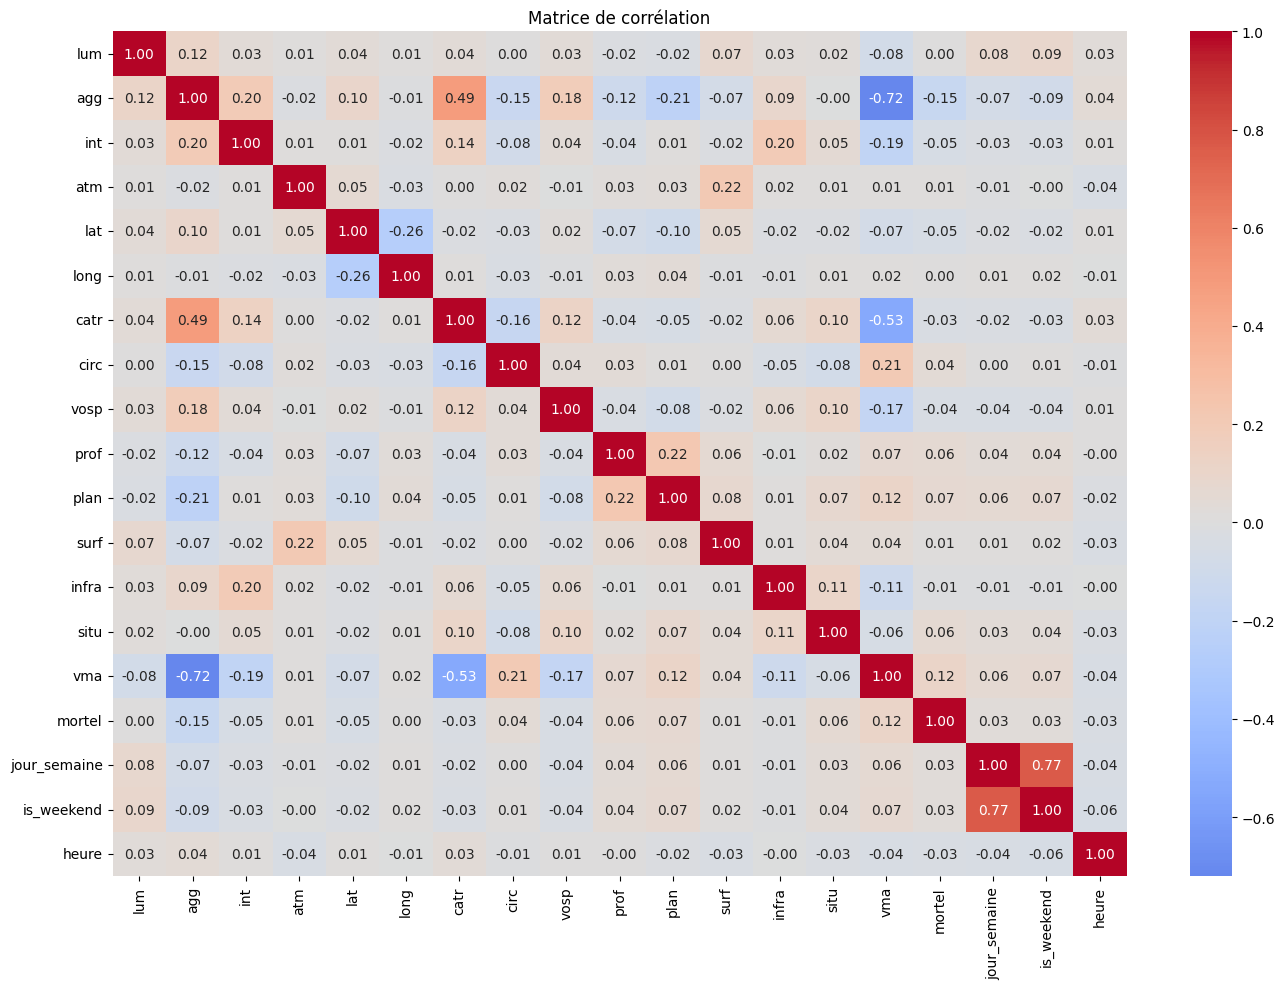

In [9]:
# Matrice de corrélation (colonnes numériques seulement)
plt.figure(figsize=(14, 10))
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

In [10]:
# Corrélations avec la target
correlations_mortel = corr['mortel'].sort_values(ascending=False)
print("Corrélations avec 'mortel' :")
print(correlations_mortel)

Corrélations avec 'mortel' :
mortel          1.000000
vma             0.115480
plan            0.066839
situ            0.060631
prof            0.057123
circ            0.043720
is_weekend      0.029426
jour_semaine    0.029202
atm             0.010278
surf            0.008109
long            0.004854
lum             0.001139
infra          -0.014360
heure          -0.029688
catr           -0.033933
vosp           -0.037508
int            -0.052742
lat            -0.053464
agg            -0.152445
Name: mortel, dtype: float64


### Corrélations

- Corrélations linéaires faibles (max 0.15) - normal pour ce type de données
- Confirmations : `agg` (-0.15) et `vma` (+0.12) cohérents avec l'analyse
- Le modèle ML captera les relations non-linéaires

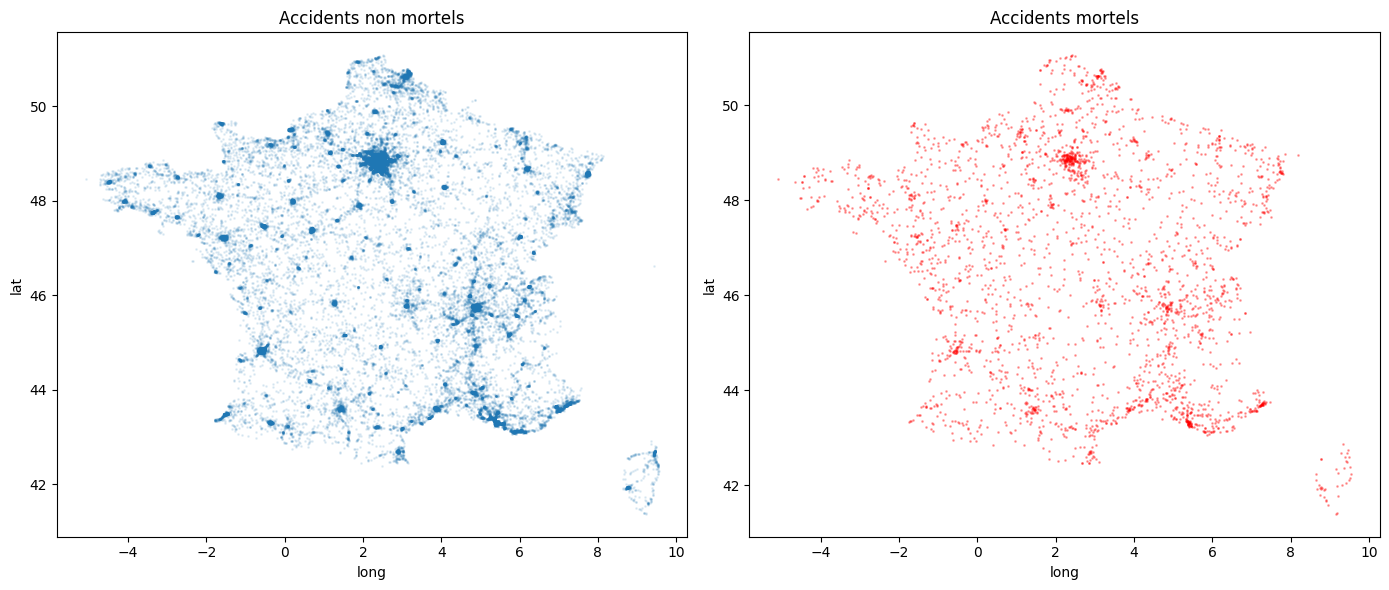

In [11]:
# Carte simple - densité d'accidents mortels vs non-mortels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non mortels
df[df['mortel']==0].plot.scatter(x='long', y='lat', alpha=0.1, s=1, ax=axes[0], title='Accidents non mortels')
# Mortels
df[df['mortel']==1].plot.scatter(x='long', y='lat', alpha=0.3, s=1, ax=axes[1], title='Accidents mortels', c='red')

plt.tight_layout()
plt.show()

### Observation : répartition géographique

- Les accidents se concentrent dans et autour des grandes agglomérations
- Zones les plus accidentogènes : Île-de-France, Côte d'Azur, région lyonnaise, métropole lilloise
- Autres pôles importants : Bordeaux, Toulouse, Nantes...
- Distribution similaire entre accidents mortels et non-mortels
- **Conclusion** : la densité d'accidents suit la densité de population et le trafic

---

## Récap Jour 3 - EDA

### Facteurs de risque identifiés

| Variable | Facteur aggravant | Facteur protecteur |
|----------|-------------------|-------------------|
| **Heure** | Nuit (22h-6h) | Journée |
| **Route** | Départementale (9.5%) | Communale (2.9%) |
| **Météo** | Brouillard (13.8%) | Pluie légère (4.7%) |
| **Luminosité** | Nuit sans éclairage (12.9%) | Nuit éclairée (3.2%) |
| **Jour** | Week-end (7.1%) | Semaine (5.5%) |
| **Zone** | Hors agglomération | Agglomération |

### Corrélations
- Corrélations linéaires faibles (normal pour ce type de données)
- Les features `agg`, `vma`, `lum`, `catr` sont confirmées pertinentes
- Le modèle ML captera les relations non-linéaires

### Prêt pour le Jour 4 - Modélisation
- Dataset propre : 51 055 lignes, 21 features
- Target binaire : mortel (5.9% positifs)
- Prochaine étape : encodage, split, gestion du déséquilibre, entraînement